In [6]:
import pickle
import sys
sys.path.append('..')
from src.sympy_utilities import *
from src.BinaryEncodings import *

import sympy as sp
h_b = 0.5*(p*p + m*m*q*q)
h_f = -0.5*m#[bdag,b]

from src.BinaryEncodings import *

hamHO = Hamiltonian(h_b, h_f, {m:1, g:1},
                     8, standard_encode)

## Harmonic Oscillator from 0000

In [7]:
import sys
sys.path.append('..')
from src.qiskit_utilities import *

trotter_step = pauli_string_to_trotter_step(hamHO.pauliStrings,1)
print(trotter_step)

global phase: -4
     ┌─────────┐ ┌─────────┐ 
q_0: ┤ RZ(0.5) ├─┤ RZ(0.5) ├─
     └┬────────┤ └┬────────┤ 
q_1: ─┤ RZ(-2) ├──┤ RZ(-2) ├─
      ├────────┤  ├────────┤ 
q_2: ─┤ RZ(-1) ├──┤ RZ(-1) ├─
     ┌┴────────┴┐┌┴────────┴┐
q_3: ┤ RZ(-0.5) ├┤ RZ(-0.5) ├
     └──────────┘└──────────┘


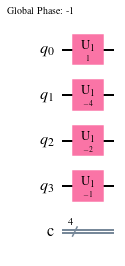

In [9]:
from qiskit import QuantumCircuit, transpile
from src.sympy_utilities import *

nqubits = max_sympy_exponent(hamHO.pauliStrings)+1
qc = QuantumCircuit(nqubits, nqubits)
qc.append(trotter_step, [i for i in range(nqubits)])
transpile(qc, basis_gates = ['cx', 'u1', 'u2', 'u3', 'H', 'X', 'Y', 'Z']).draw('mpl')

In [10]:
from qiskit import (
    execute,
    Aer)
from qiskit.providers.aer.noise import NoiseModel
from qiskit import IBMQ
from qiskit.visualization import plot_histogram

provider = IBMQ.load_account()

/home/chrisculver/miniconda3/envs/QuantumComputing/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [15]:
noise_backend = provider.get_backend('ibmq_santiago')
noise_model = NoiseModel.from_backend(noise_backend)

In [16]:
simulator = Aer.get_backend('qasm_simulator')

qc.measure([i for i in range(nqubits)],[i for i in range(nqubits)])

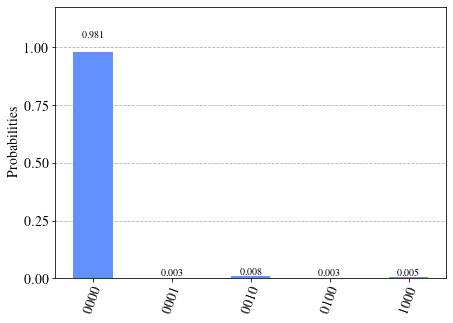

In [17]:
job = execute(qc, simulator, shots=1000, noise_model=noise_model)
result=job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

|k>=e^{iHt}|0000>   
<k|k>=0.981<0000|0000>^2 + 0.003<0001|0001>^2 + 0.008<0010|0010>^2 + 0.003<0100|0100>^2 + 0.005<1000|1000>^2

Is what is done above.

Lets say we want

<0000|H|0000>=E_0<0000|h>

Set up state
|h>=H|0000>
<h|h>=0.99<0000|0000> + 0.005<0001|0001>
<h|h>=<0000|H^dag H|0000>
<h|h>=E_0^2<0000|0000>




|h>=O|psi>
<h|h>=c_i <psi_i|psi_i>
if(0 is eigenstate of O)
<0|O^dag O|0>=lambda<0|0>

## Harmonic Oscillator from 1000

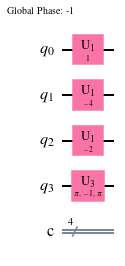

In [20]:
trotter_step = pauli_string_to_trotter_step(hamHO.pauliStrings,1)

nqubits = max_sympy_exponent(hamHO.pauliStrings)+1
qc = QuantumCircuit(nqubits, nqubits)
qc.x(nqubits-1)
qc.append(trotter_step, [i for i in range(nqubits)])
transpile(qc, basis_gates = ['cx', 'u1', 'u2', 'u3', 'H', 'X', 'Y', 'Z']).draw('mpl')

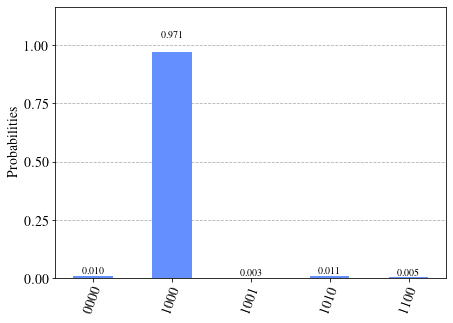

In [21]:
qc.measure([i for i in range(nqubits)],[i for i in range(nqubits)])
job = execute(qc, simulator, shots=1000, noise_model=noise_model)
result=job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

## Anharmonic Oscillator from 0000

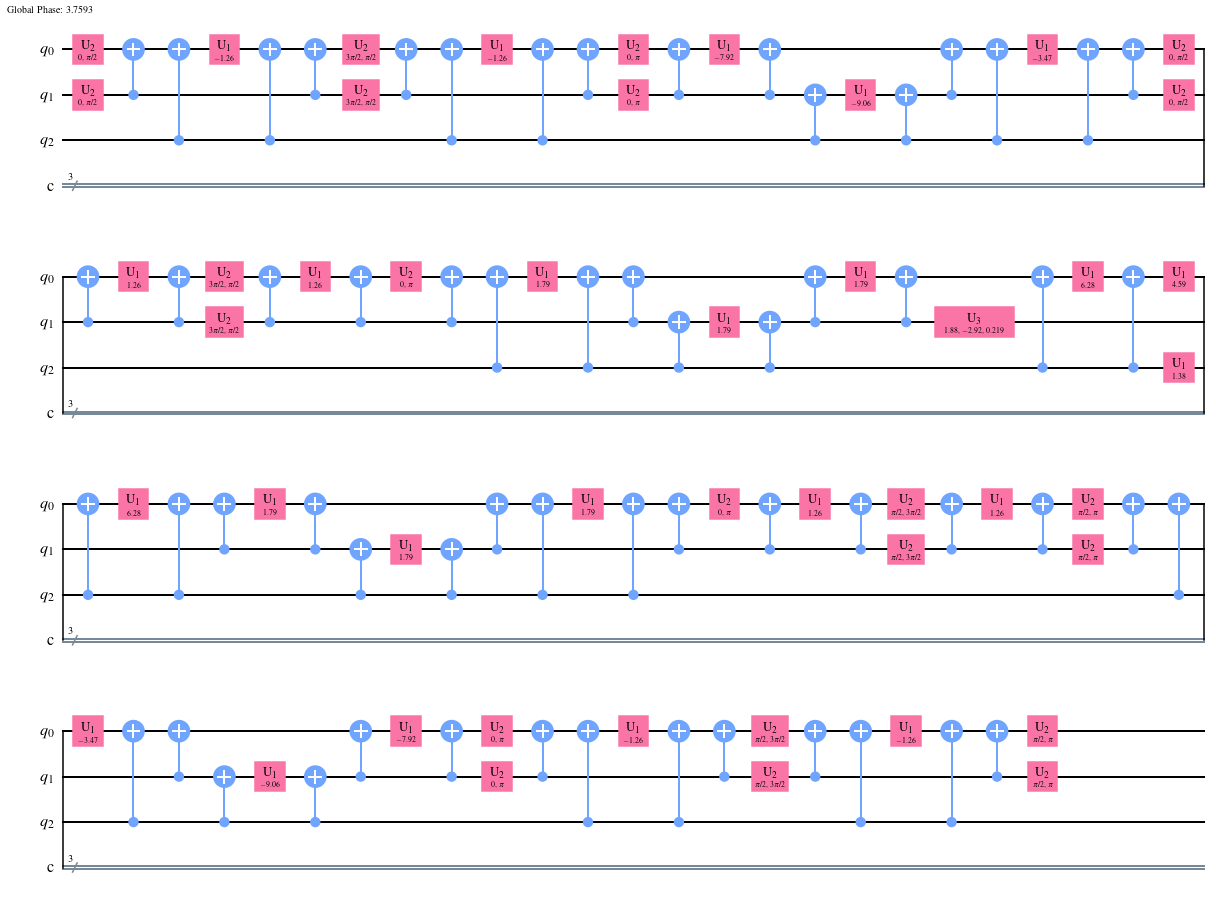

In [22]:
h_b = 0.5*(p*p + m*m*q*q + 2.*m*g*q*q*q*q + g*g*q*q*q*q*q*q)
h_f = -0.5*(m+3*g*q*q)#[bdag,b]


n=3
hamAHO = Hamiltonian(h_b, h_f, {m:1, g:1},
                    n, standard_encode)

ahoPS = hamAHO.pauliStrings

trotter_step = pauli_string_to_trotter_step(ahoPS,1)
nqubits = max_sympy_exponent(ahoPS)+1
qc = QuantumCircuit(nqubits, nqubits)
qc.append(trotter_step, [i for i in range(nqubits)])
transpile(qc, basis_gates = ['cx', 'u1', 'u2', 'u3', 'H', 'X', 'Y', 'Z']).draw('mpl')

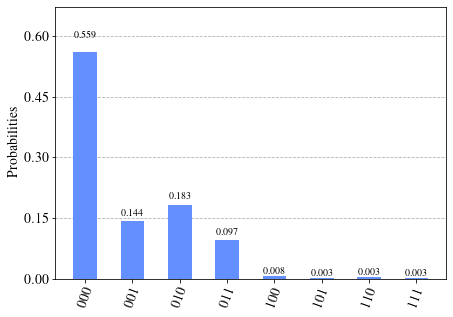

In [23]:
qc.measure([i for i in range(nqubits)],[i for i in range(nqubits)])
job = execute(qc, simulator, shots=4096, noise_model=noise_model)
result=job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

## Anharmonic oscillator from 1000

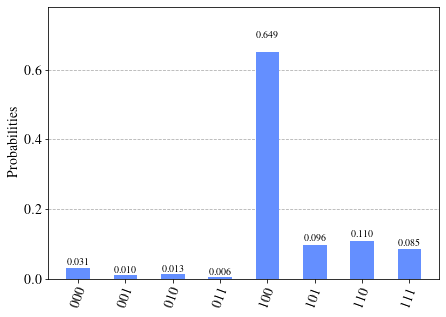

In [24]:
trotter_step = pauli_string_to_trotter_step(ahoPS,1)
nqubits = max_sympy_exponent(ahoPS)+1
qc = QuantumCircuit(nqubits, nqubits)

qc.x(nqubits-1)

qc.append(trotter_step, [i for i in range(nqubits)])
transpile(qc, basis_gates = ['cx', 'u1', 'u2', 'u3', 'H', 'X', 'Y', 'Z']).draw('mpl')

qc.measure([i for i in range(nqubits)],[i for i in range(nqubits)])
job = execute(qc, simulator, shots=4096, noise_model=noise_model)
result=job.result()
counts = result.get_counts(qc)
plot_histogram(counts)